# 로지스틱 회귀는 분류이다
### 시그모이드 함수를 통해 0,1 로 분류한다

----

# 1. 환경준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

In [2]:
path = 'https://raw.githubusercontent.com/jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

# 2. 데이터 이해

In [3]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data['Species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64

In [6]:
data.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


# 3. 데이터 준비

In [7]:
target = 'Species'

x = data.drop(target, axis=1)
y = data[target]

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=2022)  

# 4. 모델링

In [10]:
# 1. 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

#### max_iter 
 - 반복수를 뜻함
 - 지정해주지 않으면 너무 적은 반복으로 경고창이 뜰 수 있음

In [15]:
# 2. 선언하기
model = LogisticRegression(max_iter=500)

In [16]:
# 3. 학습하기
model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [17]:
# 4. 예측하기
y_pred = model.predict(x_test)

In [18]:
# 5. 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[14  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



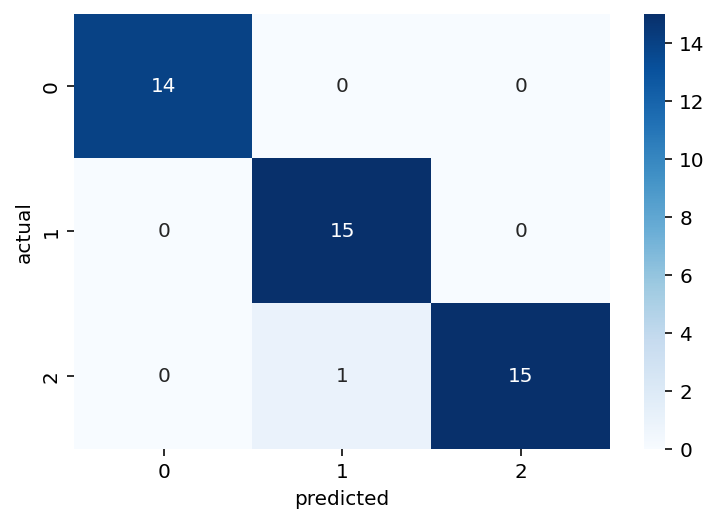

In [19]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')

plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()